In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import datetime
%matplotlib inline
%config IPCompleter.greedy=True

## Load and inspect the data

In [87]:
df = pd.read_csv('Archive/beneficiary_summary_file_2008.csv')

In [88]:
df

,BENE_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_ESRD_IND,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,MEDREIMB_IP,...,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,SEX,RACE,STATE
0,00016F745862898F,1/1/1943,NaN,0,230,12,12,0,0,0,...,0,0,0,0,700,240,0,1,1,39
1,0001FDD721E223DC,9/1/1936,NaN,0,280,12,12,0,12,0,...,0,0,0,0,0,0,0,2,1,39
2,00021CA6FF03E670,6/1/1941,NaN,0,290,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5,6
3,000308435E3E5B76,9/1/1935,NaN,0,680,10,10,0,0,0,...,0,150,160,0,870,340,80,1,1,24
4,000B4662348C35B4,7/1/1942,NaN,Y,170,12,12,0,0,0,...,0,20650,4960,5000,19030,5260,30,2,1,46
5,00131C35661B2926,11/1/1959,NaN,0,90,12,12,7,7,0,...,0,400,110,0,1860,390,0,2,1,5
6,00164E3EFB1B5604,10/1/1934,NaN,0,20,12,12,0,12,0,...,0,0,0,0,0,0,0,2,3,12
7,001876C5D3F3F6AA,7/1/1938,NaN,0,20,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,33
8,001A97937FFB5C3A,2/1/1942,NaN,0,670,12,12,0,0,0,...,0,0,0,0,0,0,0,2,2,37
9,001AEDD510C92C87,8/1/1941,NaN,0,120,12,12,0,0,0,...,0,0,0,0,0,0,0,1,2,21


In [89]:
df.describe() ## Summerizes non-string fields

,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,SEX,RACE,STATE
count,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000,23271.000000
mean,368.823858,11.159684,10.509647,2.569679,6.803231,2266.650337,253.552748,98.448713,623.038546,199.092003,26.435048,1163.831808,329.992265,17.355077,1.549998,1.292338,25.570367
std,266.761473,2.815442,3.739633,4.828075,5.820219,8540.583194,880.638946,1854.337347,1808.604491,527.326935,379.667727,1602.139065,440.788020,83.936893,0.497505,0.764495,15.564638
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.000000,0.000000,-80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,141.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
50%,331.000000,12.000000,12.000000,0.000000,12.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,600.000000,170.000000,0.000000,2.000000,1.000000,25.000000
75%,560.000000,12.000000,12.000000,0.000000,12.000000,0.000000,0.000000,0.000000,530.000000,180.000000,0.000000,1660.000000,480.000000,0.000000,2.000000,1.000000,39.000000
max,999.000000,12.000000,12.000000,12.000000,12.000000,164220.000000,36048.000000,68000.000000,44220.000000,9580.000000,14000.000000,19030.000000,5260.000000,2040.000000,2.000000,5.000000,54.000000


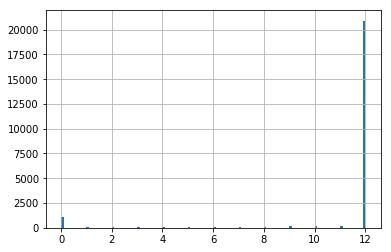

In [90]:
df.BENE_HI_CVRAGE_TOT_MONS.hist(bins=120)

# Step 1: Build a basic cohort using CMS Medicare Beneficiary Summary File data.
Inclusion/Exclusion Criteria: 
- Alive the entire year
- Age =>65 entire year
- 12 months of Parts A and B coverage
- 0 months of HMO
- Limit to U.S. Residents only

### Criterion A: Alive the entire year (2008)
Given that all reported deaths happen in 2008 (verified below), because diseased benefactors wouldn't be included, __remove non-empty columns for BENE_DEATH_DT.__

In [91]:
def extract_year(s):
    return s[-4:]
df.BENE_DEATH_DT.dropna().apply(extract_year).unique()

array(['2008'], dtype=object)

In [92]:
df = df[pd.isnull(df.BENE_DEATH_DT)]

### Criterion B: Age >= 65 entire year (2008)

In [93]:
assert df.BENE_BIRTH_DT.isna().sum() == 0

In [94]:
dob_year_to_be_65 = 2008 - 65
df = df[pd.to_datetime(df.BENE_BIRTH_DT, infer_datetime_format=True) < pd.to_datetime(f'{dob_year_to_be_65}/01/01')]

In [95]:
day_before_2008 = pd.Timestamp('2007/12/31')
dobs = pd.to_datetime(df.BENE_BIRTH_DT, infer_datetime_format=True)
df['AGE'] = (day_before_2008 - dobs).astype('<m8[Y]')

In [96]:
df = df[df.AGE >= 65]

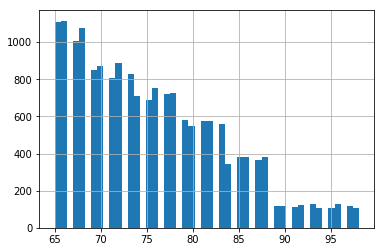

In [97]:
df.AGE.hist(bins=50)

### Criterion C: 12 months of Parts A and B coverage

In [98]:
part_a_cvrage = 'BENE_HI_CVRAGE_TOT_MONS'
part_b_cvrage = 'BENE_SMI_CVRAGE_TOT_MONS'

#### Verify error-free distribution, ie all data between 0 and 12

In [99]:
df[part_a_cvrage].describe()

count    18002.000000
mean        11.263193
std          2.652504
min          0.000000
25%         12.000000
50%         12.000000
75%         12.000000
max         12.000000
Name: BENE_HI_CVRAGE_TOT_MONS, dtype: float64

In [100]:
df[part_b_cvrage].describe()

count    18002.000000
mean        10.650983
std          3.577781
min          0.000000
25%         12.000000
50%         12.000000
75%         12.000000
max         12.000000
Name: BENE_SMI_CVRAGE_TOT_MONS, dtype: float64

In [101]:
df = df[(df[part_a_cvrage] == 12) & (df[part_b_cvrage] == 12)]

### Criterion D: 0 months of HMO

In [102]:
df = df[df.BENE_HMO_CVRAGE_TOT_MONS == 0]

### Criterion E: Limit to U.S. Residents only
Note: Patients marked as 'Other' (code: `54`) include those whose state of residence is outside a USA state. However, one possibility of 'Other' is "PUERTO RICO, VIRGIN ISLANDS, AFRICA, ASIA OR CALIFORNIA." Under this definition, by excluding 'Other' we may be excluding California... ?

In [103]:
other_code = 54
df = df[df.STATE != other_code]

# Step 2: Identify beneficiaries with Congestive Heart Failure (CHF) by merging to the Part B Carrier file

CHF is defined using the following diagnosis codes: 398.91, 402.11, 402.91, 404.11, 404.13, 404.91, 404.93, 428.x

Using the data you produced from steps 1 and 2, please create a “Table 1: Beneficiary Characteristics”.

### Read in carrier data

In [104]:
carrier_df = pd.read_csv('Archive/carrier_2008.csv', low_memory=False)

In [105]:
carrier_df.head()

,BENE_ID,CLM_ID,CLM_FROM_DT,CLM_THRU_DT,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,...,LINE_ICD9_DGNS_CD_5,LINE_ICD9_DGNS_CD_6,LINE_ICD9_DGNS_CD_7,LINE_ICD9_DGNS_CD_8,LINE_ICD9_DGNS_CD_9,LINE_ICD9_DGNS_CD_10,LINE_ICD9_DGNS_CD_11,LINE_ICD9_DGNS_CD_12,LINE_ICD9_DGNS_CD_13,npi_specialty
0,00016F745862898F,887523386668713,10/4/2008,10/4/2008,82311,3558,V0481,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
1,00016F745862898F,887793388522804,10/8/2008,10/8/2008,78963,4010,78909,78701,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84
2,00016F745862898F,887783385091632,10/9/2008,10/18/2008,2514,30000,2449,2859,NaN,NaN,...,2599,2599,2599,2599,2599,NaN,NaN,NaN,NaN,97
3,00016F745862898F,887953385848149,10/20/2008,10/20/2008,59971,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
4,00016F745862898F,887423388326030,12/9/2008,12/9/2008,87362,49390,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38


### Identify columns containing diagnosis codes

In [106]:
diagnosis_code_cols = [col for col in carrier_df.columns if 'DGNS' in col]

In [107]:
diagnosis_code_cols

['ICD9_DGNS_CD_1',
 'ICD9_DGNS_CD_2',
 'ICD9_DGNS_CD_3',
 'ICD9_DGNS_CD_4',
 'ICD9_DGNS_CD_5',
 'ICD9_DGNS_CD_6',
 'ICD9_DGNS_CD_7',
 'ICD9_DGNS_CD_8',
 'LINE_ICD9_DGNS_CD_1',
 'LINE_ICD9_DGNS_CD_2',
 'LINE_ICD9_DGNS_CD_3',
 'LINE_ICD9_DGNS_CD_4',
 'LINE_ICD9_DGNS_CD_5',
 'LINE_ICD9_DGNS_CD_6',
 'LINE_ICD9_DGNS_CD_7',
 'LINE_ICD9_DGNS_CD_8',
 'LINE_ICD9_DGNS_CD_9',
 'LINE_ICD9_DGNS_CD_10',
 'LINE_ICD9_DGNS_CD_11',
 'LINE_ICD9_DGNS_CD_12',
 'LINE_ICD9_DGNS_CD_13']

### Identify CHF claims

#### Format codes as strings

In [108]:
def has_428x_code(r):
    return r.str.contains('^428', regex=True).any()


chf_diagnosis_codes = ['39891', '40211', '40291', '40411', '40413', '40491', '40493',]
def is_chf_diagnosis_code(r):
    '''Matches any of other codes besides 428.x'''
    return r.isin(chf_diagnosis_codes).any()


def get_chf_claims(df, columns_to_search=diagnosis_code_cols):
    '''Return all rows containing a CHF claim'''
    d = df[columns_to_search]
    return df[d.apply(lambda r: is_chf_diagnosis_code(r) or has_428x_code(r), axis=1)]

In [109]:
# FOR TESTING PURPOSES
d = pd.DataFrame({
    'x': ['40413', '39891', ''],
    'y': ['', '', '42833'],
    'z': ['', '42800', '33333333']
})
get_chf_claims(d, columns_to_search=['x','y','z'])

,x,y,z
0,40413,,
1,39891,,42800
2,,42833,33333333


In [110]:
chf_claims = get_chf_claims(carrier_df)
chf_claims.describe()

,CLM_ID,PRF_PHYSN_NPI_1,TAX_NUM_1,LINE_NCH_PMT_AMT_1,LINE_NCH_PMT_AMT_2,LINE_NCH_PMT_AMT_3,LINE_NCH_PMT_AMT_4,LINE_NCH_PMT_AMT_5,LINE_NCH_PMT_AMT_6,LINE_NCH_PMT_AMT_7,...,LINE_ALOWD_CHRG_AMT_5,LINE_ALOWD_CHRG_AMT_6,LINE_ALOWD_CHRG_AMT_7,LINE_ALOWD_CHRG_AMT_8,LINE_ALOWD_CHRG_AMT_9,LINE_ALOWD_CHRG_AMT_10,LINE_ALOWD_CHRG_AMT_11,LINE_ALOWD_CHRG_AMT_12,LINE_ALOWD_CHRG_AMT_13,npi_specialty
count,9.643000e+03,9.588000e+03,9.643000e+03,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000,...,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000
mean,8.875056e+14,4.914853e+09,4.836358e+08,57.928031,14.458156,7.990252,4.079643,2.964845,1.840713,0.914653,...,3.645131,2.292855,0.985171,0.801618,0.502956,0.305921,0.169035,0.170072,0.183553,48.766774
std,2.849480e+11,2.885279e+09,2.872996e+08,65.297019,40.516582,28.963014,19.531186,17.712865,15.924876,9.402017,...,23.141954,20.072481,9.415840,10.637741,10.358942,4.798334,3.501629,3.599435,7.420848,29.006863
min,8.870134e+14,1.681220e+05,1.866510e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.872534e+14,2.374931e+09,2.349065e+08,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,8.875034e+14,4.902713e+09,4.864902e+08,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000
75%,8.877534e+14,7.399959e+09,7.249077e+08,80.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000
max,8.879934e+14,9.999449e+09,9.999624e+08,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,370.000000,...,670.000000,670.000000,350.000000,670.000000,670.000000,180.000000,170.000000,190.000000,670.000000,97.000000


### Create field `HAS_CHF` for cohort using claims

In [111]:
bene_id_with_chf = chf_claims.BENE_ID.unique()
len(bene_id_with_chf)

5603

In [112]:
df['HAS_CHF'] = df.BENE_ID.isin(bene_id_with_chf)

In [113]:
bene_with_chf = df[df['HAS_CHF']]

In [114]:
bene_with_chf

,BENE_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_ESRD_IND,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,MEDREIMB_IP,...,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,SEX,RACE,STATE,AGE,HAS_CHF
4,000B4662348C35B4,7/1/1942,NaN,Y,170,12,12,0,0,0,...,4960,5000,19030,5260,30,2,1,46,65.0,True
11,001E32373E05BA96,9/1/1921,NaN,0,970,12,12,0,12,0,...,360,0,2070,490,10,2,1,45,86.0,True
32,004FACDB62274D04,10/1/1921,NaN,Y,660,12,12,0,12,7000,...,320,0,1560,410,0,2,1,34,86.0,True
39,0065A917BBAEC579,1/1/1919,NaN,0,90,12,12,0,0,7000,...,230,0,2060,800,90,1,1,22,88.0,True
41,006C7FC30305A339,2/1/1940,NaN,0,0,12,12,0,12,0,...,50,0,150,20,0,1,1,7,67.0,True
42,006D1BD234E5C844,7/1/1914,NaN,Y,10,12,12,0,0,6000,...,1000,0,3820,1220,0,1,1,7,93.0,True
43,0071E2E641B73233,5/1/1926,NaN,Y,120,12,12,0,0,0,...,5760,0,12590,2770,330,1,1,10,81.0,True
50,008C0A4FEB2D5501,2/1/1934,NaN,0,490,12,12,0,12,0,...,60,0,700,190,40,2,1,10,73.0,True
51,00918A7F4BEB02E8,11/1/1936,NaN,0,0,12,12,0,0,4000,...,100,0,3540,1050,0,1,1,10,71.0,True
55,0099D61CA5679A90,6/1/1937,NaN,0,280,12,12,0,12,0,...,100,0,930,340,0,2,1,15,70.0,True


### Save file ("table") to csv

In [115]:
df.to_csv('Table 1: Beneficiary Characteristics.csv')

# Step 3: Amongst beneficiaries who have CHF, provide the crude rate of those with at least 1 visit to a Primary Care Provider

Office visits are defined using HCPC codes: ‘99201’-‘99205’ & ‘99211’-‘99215’

### Generate visit codes for ranges: `99201-99205` & `99211-99215`

In [116]:
visit_codes = [code for code in range(99201, 99205 + 1)] + [code for code in range(99211, 99215 + 1)]
visit_codes = [str(code) for code in visit_codes]

In [117]:
visit_code_cols = [col for col in carrier_df.columns if 'HCPCS_CD_' in col]

In [118]:
def visited_primary_care_provider(r):
    return r.isin(visit_codes).any()


def get_visits(df, columns_to_search=visit_code_cols):
    '''Return all rows containing a primary care office visit'''
    d = df[columns_to_search]
    return df[d.apply(visited_primary_care_provider, axis=1)]

### Identify CHF patients who've visited a primary care provider

In [119]:
claims_from_bene_with_chf = carrier_df[carrier_df.BENE_ID.isin(bene_id_with_chf)]

In [120]:
# Filter claims by visit
visits_for_chf_benes = get_visits(claims_from_bene_with_chf, )

In [121]:
chf_bene_ids_with_visits = visits_for_chf_benes.BENE_ID.unique()
chf_bene_with_visits = df[df.BENE_ID.isin(chf_bene_ids_with_visits)]
percent_with_visits = len(chf_bene_with_visits.BENE_ID) / len(bene_with_chf.BENE_ID)
print(f'{100*round(percent_with_visits, 2)}% of CHF patients visited a primary care provider at least once in 2008.')

98.0% of CHF patients visited a primary care provider at least once in 2008.


# Step 4: Perform a logistic regression with covariates age/sex/race on the outcome of having at least 1 visit to a Primary Care Provider.

### Prep covariates and outcome variable

#### Add outcome variable `HAS_VISITED_PCP`

In [122]:
# Get all primary care visit claims
all_visit_claims = get_visits(carrier_df)

In [123]:
# Annotate beneficiaries with whether they've made a visit
bene_id_with_visit = all_visit_claims.BENE_ID.unique()
df['HAS_VISITED_PCP'] = df.BENE_ID.isin(bene_id_with_visit).astype(int)

In [129]:
# Select just age/sex/race features we need
covariates = ['AGE', 'SEX', 'RACE']
small = df.head(10000)[['HAS_VISITED_PCP'] + covariates]
# C
col_mapping = {
    'RACE_1': 'WHITE',
    'RACE_2': 'BLACK',
    'RACE_3': 'OTHER_RACES',
    'RACE_5': 'HISPANIC',
    
    'SEX_1': 'MALE',
    'SEX_2': 'FEMALE',
}

regr_df = pd.get_dummies(small, columns=['SEX', 'RACE'], prefix=['SEX', 'RACE'])
regr_df = regr_df.rename(index=str, columns=col_mapping)

### Train, and validate logistic regression model

In [131]:
# Declare a logistic regression classifier.
lr = LogisticRegression(solver='lbfgs') # Large Parameter regularization coefficient C essentially nullifies its effect.
y = regr_df.HAS_VISITED_PCP
X = regr_df.drop('HAS_VISITED_PCP', axis=1)

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Intercept')
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy of visit prediction')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Intercept
[-0.59781653]

 Accuracy of visit prediction
HAS_VISITED_PCP     0     1
row_0                      
1                2318  7682

 Percentage accuracy
0.7682


In [132]:
coef_dict = {}
for coef, feat in zip(lr.coef_[0], X.columns):
    coef_dict[feat] = coef
coef_dict

{'AGE': 0.025907825149516065,
 'MALE': -0.2605112512215928,
 'FEMALE': -0.31596454917839123,
 'WHITE': 0.2047750034777389,
 'BLACK': -0.21890892843218562,
 'OTHER_RACES': -0.26734162042124615,
 'HISPANIC': -0.2950002550242289}

# Step 5 (bonus step): Produce crude average spending per beneficiary by state.